

Present a description of the essential elements of plane group symmetry, matrix algebra, and group theory to understand how these are related;
Identify the audience for which the work is intended;
Run the code necessary to draw one of the plane groups;
Provide a narrative and equations to explain why your approach is relevant to solving the problem;
Provide references and citations to any others' work you use to complete the assignment;
Be checked into your GitHub repository by the due date (one week from assignment).
A high quality communication provides an organized, logically progressing, blend of narrative, equations, and code that teaches the reader a particular topic or idea. You will be assessed on:

The functionality of the code (i.e. it should perform the task assigned).
The narrative you present. I should be able to read and learn from it. Choose your audience wisely.
The supporting equations and figures you choose to include.
If your notebook is just computer code your assignment will be marked incomplete.

### Introduction

Operations involving vectors are vital for numerous reasons in computing, mathematics, science, and engineering. For example, in crystallography, the use of vectors greatly simplifies the description of and quantitative operations on crystal structures. There are four major categories of vector operations: reflections, rotations, stretches/shrinks, and translations. Matrix operations are the primary method for applying these vector operations.

### Plane Groups

There are 17 plane groups, each representing a different combination of translations, reflections, and rotations. A typical symbol  to use for listing these plane groups is an uppercase "R" because it only has one axis of symmetry. Each plane group is made up of a lattice and a point group. there are five lattices and twelve point groups.

See Figure 1 for a listing of the plane groups. See Figure 2 for a listing of all the lattices, and see Figure 3 for a listing of all the point groups.

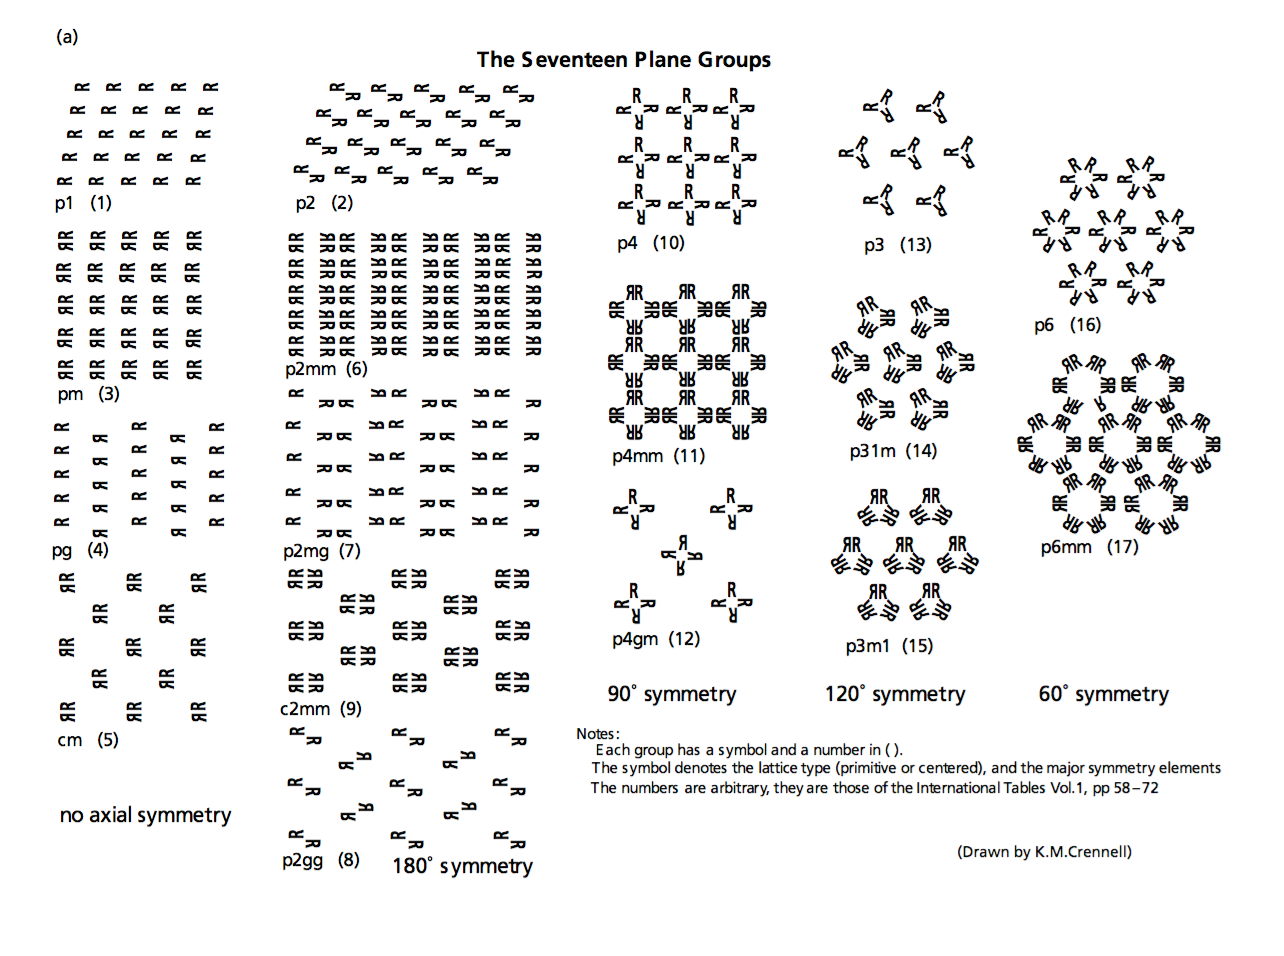

*Figure 1: The Plane Groups*

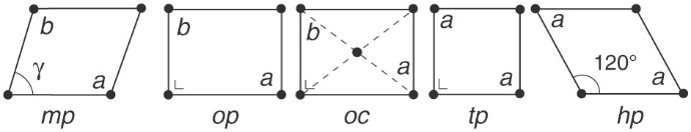

*Figure 2: Lattices*

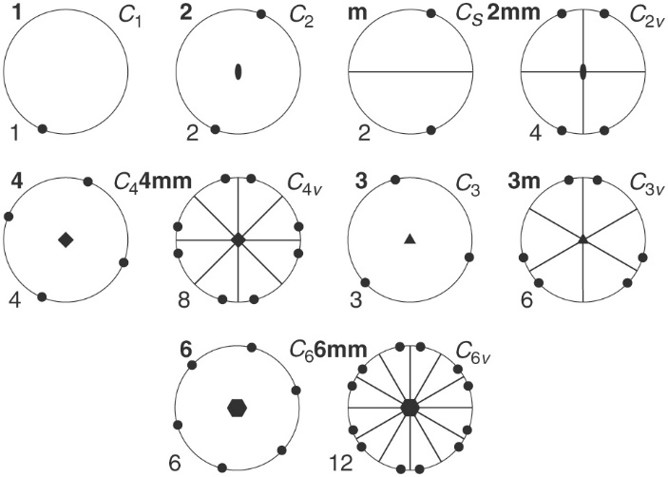

*Figure 3: Point Groups*

The symbol "R" in this consists of a group of vectors, all of which have the same set of matrix operations applied to them. For example, in plane group 10,  every vector in R is rotated through point group 4 and then lattice oc is applied to the point group.

The matrix operation in question can be thought of as augmenting the transformation matrix with the original vector to find the new vector. For example, this rotational matrix:

$$\begin{bmatrix} x'\\ y'\\ 1\\ \end{bmatrix}=\begin{bmatrix} \cos{\theta} & \sin{\theta} & 0\\ -\sin{\theta} & \cos{\theta}&0\\ 0 & 0 & 1\\ \end{bmatrix}\begin{bmatrix}x\\ y\\ 1\\ \end{bmatrix}$$

expands to

$$x' = x*\cos{\theta} + y*\sin{\theta} $$

and

$$y' = x*-\sin{\theta} + y*\cos{\theta} $$

We will keep this in mind as we write our code.


In [8]:
import numpy as np

class Point:
    """
    A Point object to simplify storage of (x,y) positions.
    p1.x, p1.y, etc...
    """
    def __init__(self,x_init,y_init):
        self.x = x_init
        self.y = y_init

    def shift(self, x, y):
        self.x += x
        self.y += y

    def __repr__(self):
        return "".join(["Point(", str(self.x), ",", str(self.y), ")"])
    
class Triangle:
    """
    A Triangle class constructed from points.  Helps organize information on
    triangles.  Has a points() method for returning points in a form that 
    can be used with polygon drawing from Python Image Library (PIL) and a 
    method, affine(), that applies a matrix transformation to the points.
    """
    def __init__(self, p1_init, p2_init, p3_init):
        self.p1 = p1_init
        self.p2 = p2_init
        self.p3 = p3_init
        
    def points(self):
        x1, y1 = self.p1.x, self.p1.y
        x2, y2 = self.p2.x, self.p2.y
        x3, y3 = self.p3.x, self.p3.y
        
        return [(x1,y1),(x2,y2),(x3,y3)]
        
    def affine(self, affineMatrix):
        """
        Applies an affine transformation to a triangle and changes the 
        points of the triangle.  This code returns a new triangle.  Uses
        Points to simplify augmenting the matrix and dot products.
        """
        x1, y1 = self.p1.x, self.p1.y
        x2, y2 = self.p2.x, self.p2.y
        x3, y3 = self.p3.x, self.p3.y
        
        p1Vector = np.array([[x1, y1, 1]])
        p2Vector = np.array([[x2, y2 , 1]])
        p3Vector = np.array([[x3, y3, 1]])
        
        p1New = np.dot(affineMatrix, p1Vector.T)
        p2New = np.dot(affineMatrix, p2Vector.T)
        p3New = np.dot(affineMatrix, p3Vector.T)
        
        
        newTriangle = Triangle(Point(p1New[0,0],p1New[1,0]),Point(p2New[0,0],p2New[1,0]),Point(p3New[0,0],p3New[1,0]))
        
        return newTriangle

In the above code, we create the classes we will use to create our triangles. We start by making the `Point` class,  which creates a container for an x and y position, which allows a more natural refrencing of points in our code.

We use this class in our `Triangle` class. The most important part of this class is the `affine()` method, which we use to transform our triangles. It takes a triangle, converts the points into `Numpy` arrays and then multiplies them by the transformation matrix to create a new triangle while preserving the old one.

Once we have our classes created, we will then define functions to create the arrays we will use for `affine()`. For instance, I have created the `rotate(theta)` function, which takes an angle and outputs a rotation matrix in the form of a `Numpy` array.

Then, using the `Triangle` class to create an intial triangle, I use a `for` loop to rotate the triangle, adding each new one to a list. Using `Image` and `ImageDraw`, I create a canvas and draw the triangles on it.

In [18]:
%matplotlib inline

import numpy as np
import math
from PIL import Image, ImageDraw



def VecA(i,x,y):

    return None
def VecB(j,x,y):
    return None

def mirrorY():
    return None

def mirrorX():
    return  None

def rotate(theta):
    return  np.array([[np.cos(theta), np.sin(theta),0],[-np.sin(theta),  np.cos(theta),0], [0,0,1]])



#Create triangle
t1 = Triangle(Point(10,10),Point(40,10),Point(10,50))
triangleList = [t1]
#Creat 90 degree rotation of triangle
for i in range (1,4):
   
    t = t1.affine(rotate(i*np.pi/2))
    triangleList.append(t)
    



#Translate the triangles



      
        
#Mirror the triangles


image = Image.new('RGB', (500, 500), 'white')
draw = ImageDraw.Draw(image)


#for triangle in triangleList:
    #draw.polygon(triangle.points(), outline='black', fill='red')

#image

1
2
3


Remove the last three comments and run the code. You will notice a problem: you can only see one triangle. This is because the others have rotated themselves off the campus. There are multiple ways this could be solved. We will do so by using `affine()` method to center the triangles, as shown below. (Replace the comments or there will be an extra triangle)

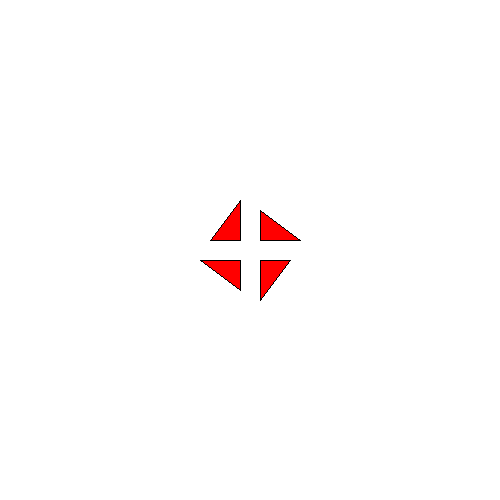

In [19]:
# Using an affine transformation to center the triangles in the drawing
# as canvas coordinates are (0,0) at the top left.
centerMatrix = np.array([[1,0,250],[0,1,250],[0,0,1]])
drawList = [triangle.affine(centerMatrix) for triangle in triangleList]
for triangle in drawList:
    draw.polygon(triangle.points(), outline='black', fill='red')

image

Now, consider some ways to improve or extend the code I have just demonstrated. Here are some suggestions:

- You could add reflections
- You could add translations

See what other point groups you can create!
